In [1]:
import pandas as  pd

data = pd.read_csv('/Users/jasminetaha/Downloads/data.csv')
data.head()

,Unnamed: 0,Order id,Date,Status,Fulfilment,Ship-service-level,Qty,Currency,Amount,Ship-city,Revenue,Year,Month_name
0,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,1,INR,406.0,BENGALURU,406.0,2022,April
1,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,1,INR,329.0,NAVI MUMBAI,329.0,2022,April
2,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,1,INR,574.0,CHENNAI,574.0,2022,April
3,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Expedited,1,INR,824.0,GHAZIABAD,824.0,2022,April
4,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Expedited,1,INR,653.0,CHANDIGARH,653.0,2022,April


In [ ]:
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")


data["Revenue"] = pd.to_numeric(data["Revenue"], errors="coerce")


df = data.dropna(subset=["Date", "Revenue"]).copy()


monthly_sales = (
    df.set_index("Date")
      .resample("M")["Revenue"]
      .sum()
      .reset_index()
      .rename(columns={"Revenue": "Total_Sales"})
)

monthly_sales.head(), monthly_sales.tail()

/var/folders/_3/404r5_yd5rx0b2rrt7690lzm0000gn/T/ipykernel_2683/2207372673.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["Revenue"]


(        Date  Total_Sales
 0 2022-03-31      94810.0
 1 2022-04-30   26484130.0
 2 2022-05-31   24139480.0
 3 2022-06-30   21538431.0,
         Date  Total_Sales
 0 2022-03-31      94810.0
 1 2022-04-30   26484130.0
 2 2022-05-31   24139480.0
 3 2022-06-30   21538431.0)

In [3]:
monthly_sales.shape
monthly_sales["Total_Sales"].describe()


count    4.000000e+00
mean     1.806421e+07
std      1.214871e+07
min      9.481000e+04
25%      1.617753e+07
50%      2.283896e+07
75%      2.472564e+07
max      2.648413e+07
Name: Total_Sales, dtype: float64

In [8]:
from sklearn.linear_model import LinearRegression

X = monthly_sales[["Time_Index"]]
y = monthly_sales["Total_Sales"]

model = LinearRegression()
model.fit(X, y)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
monthly_sales["Time_Index"] = range(len(monthly_sales))
monthly_sales

,Date,Total_Sales,Time_Index
0,2022-03-31,94810.0,0
1,2022-04-30,26484130.0,1
2,2022-05-31,24139480.0,2
3,2022-06-30,21538431.0,3


In [9]:
import numpy as np
import pandas as pd

last_index = monthly_sales["Time_Index"].max()
last_date = monthly_sales["Date"].max()

future_dates = pd.date_range(
    start=last_date + pd.offsets.MonthEnd(1),
    periods=2,
    freq="M"
)

future_df = pd.DataFrame({
    "Date": future_dates,
    "Time_Index": [last_index + 1, last_index + 2]
})

future_df["Predicted_Sales"] = model.predict(future_df[["Time_Index"]])
future_df


/var/folders/_3/404r5_yd5rx0b2rrt7690lzm0000gn/T/ipykernel_2683/3923530920.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


,Date,Time_Index,Predicted_Sales
0,2022-07-31,4,33560766.0
1,2022-08-31,5,39759387.3


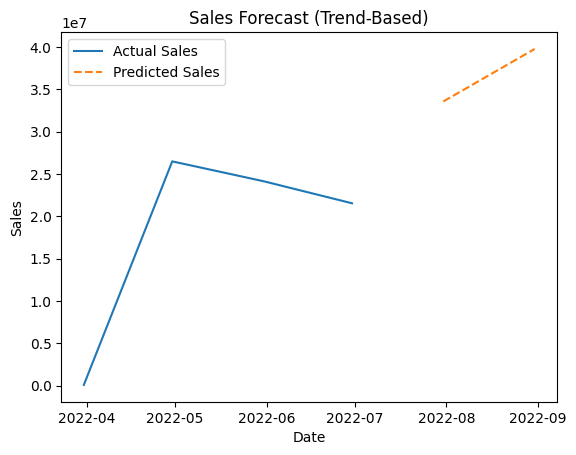

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(monthly_sales["Date"], monthly_sales["Total_Sales"], label="Actual Sales")
plt.plot(future_df["Date"], future_df["Predicted_Sales"], label="Predicted Sales", linestyle="--")
plt.legend()
plt.title("Sales Forecast (Trend-Based)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


Due to limited historical data, a simple trend-based model was used for short-term forecasting.Only 4 months of sales data was used.

In [12]:
monthly_sales.to_csv("~/historical_sales.csv", index=False)
future_df.to_csv("~/sales_forecast.csv", index=False)

